## Fully Connected Neural Network
***

In [8]:
import math
import numpy as np

import matplotlib.pyplot as plt

from deep_learning.neural_network import NeuralNetwork
from deep_learning.optimizers import StochasticGradientDescent, Adam, RMSprop, Adagrad, Adadelta
from deep_learning.loss_functions import SquareLoss
from deep_learning.layers import (Dense, Dropout, Conv2D, Activation, MaxPooling2D,
                                  AveragePooling2D, ZeroPadding2D)

from utils.data_manipulation import train_test_split, normalize, shuffle_data, to_categorical
from utils.misc import Plot, bar_widgets

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
def true_function(x):
    """

    :param x: ndarray

    :return:
    """
    return np.sin(2 *  np.pi * x)

In [16]:
X = np.random.uniform(low=0.0, high=1.0, size=100).reshape((-1, 1))
y = true_function(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, seed=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, seed=1)

In [17]:
optimizer = StochasticGradientDescent()
NN = NeuralNetwork(optimizer=optimizer,
                    loss=SquareLoss,
                    validation_data=(X_val, y_val))

NN.add(Dense(n_units=100, input_shape=(1, )))
NN.add(Activation('relu'))
NN.add(Dense(n_units=1))

print()
NN.summary(name='FCNet')


+-------+
| FCNet |
+-------+
Input shape: (1,)
+-------------------+------------+--------------+
| Layer Type        | Parameters | Output Shape |
+-------------------+------------+--------------+
| Dense             | 200        | (100,)       |
| Activation (ReLu) | 0          | (100,)       |
| Dense             | 101        | (1,)         |
+-------------------+------------+--------------+
Total Parameters: 301



In [18]:
train_err, val_err = NN.fit(X_train, y_train, n_epochs=50, batch_size=64)
y_pred = NN.predict(X_test)

Training: 100% [------------------------------------------------] Time: 0:00:00


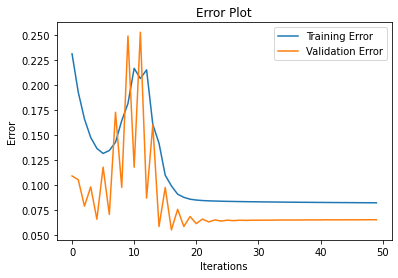

<Figure size 432x288 with 0 Axes>

In [19]:
# Training and validation error plot
n = len(train_err)
training, = plt.plot(range(n), train_err, label="Training Error")
validation, = plt.plot(range(n), val_err, label="Validation Error")
plt.legend(handles=[training, validation])
plt.title("Error Plot")
plt.ylabel('Error')
plt.xlabel('Iterations')
plt.show()
plt.clf()

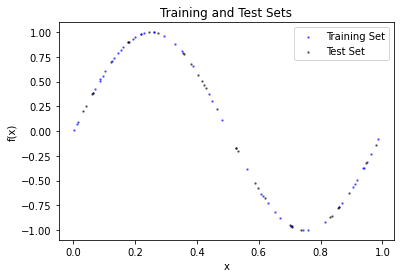

In [20]:
# Plot training and test set
training_set = plt.scatter(X_train, y_train, label="Training Set", color='blue', s=2, alpha=0.5)
test_set = plt.scatter(X_test, y_test, label="Test Set", color='black', s=2, alpha=0.5)
plt.legend()
plt.title("Training and Test Sets")
plt.ylabel('f(x)')
plt.xlabel('x')
plt.show()
